<a href="https://colab.research.google.com/github/AashiDutt/Hands-on-Machine-Learning-with-sklearn-keras-and-tensorflow/blob/main/Decision_Trees_Chapter_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Trees are the components of Random Forests


In [1]:
# Training and visualizing a decision tree

from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [4]:
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [5]:
import sys
import numpy as np
import os
np.random.seed(42)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok = True)

In [6]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(tree_clf, 
                out_file = os.path.join(IMAGES_PATH, "iris_tree.dot"),
                feature_names = iris.feature_names[2:],
                class_names = iris.target_names,
                rounded = True,
                filled = True)

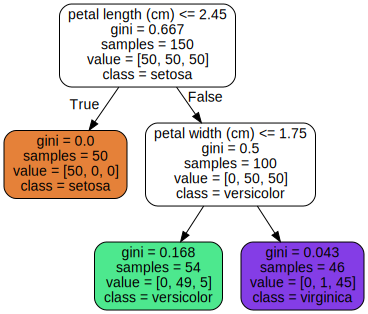

In [7]:
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [8]:
# estimating class probabilities

tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [9]:
tree_clf.predict([[5,1.5]])

array([1])

# CART Algorithm - used for creating binary decision trees
this algo splits training set into 2 subsets using a single feature k and a threshold tk.

It searches for a set of (k, tk) that produces the purest subsets i.e all instances belong to same class. 

It recursively does the spitting till it has reached the max depth.

Instead of minimizing the impurity , it tries to minimize MSE.


Gini Impurity and Entropy - both signify the measure of impurity i.e entropy or gini is zero when all instances are of same clas.

In [11]:
# Decision tree regressor

# linear data with noise

m = 200
X = np.random.rand(m,1)
y = 4 * (X-0.5) ** 2

y = y + np.random.randn(m,1) /10

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 2, random_state = 2)
tree_reg.fit(X,y)



DecisionTreeRegressor(max_depth=2, random_state=2)

In [12]:

export_graphviz(tree_reg, 
                out_file = os.path.join(IMAGES_PATH, "regression_tree.dot"),
                feature_names = ["x1"],
                rounded = True,
                filled = True)

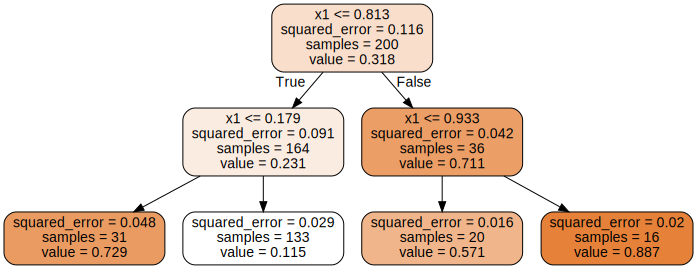

In [13]:
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))